1. Import necessary libraries


In [91]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [92]:
df_sales = pd.read_csv("C:\\Users\\nisha\\Desktop\\IIITH\\sales_data.csv", encoding='Latin-1')

In [93]:
df_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


2. Display a sample of five rows of the data frame.


In [94]:
df_sales.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


3. Check the shape of the data (number of rows and columns). Check the
general information about the dataframe using the .info() method.


In [95]:
df_sales.shape

(2823, 25)

In [96]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


4. Check the percentage of missing values in each column of the data
frame. Drop the missing values if there are any.


In [97]:
Total = df_sales.isnull().sum().sort_values(ascending=False)
Percent = (df_sales.isnull().sum()*100/df_sales.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


5. Check if there are any duplicate rows.

In [98]:
df_sales.duplicated().sum()

0

6. Write a function that will impute missing values of the columns “STATE”,
“POSTALCODE”,“TERRITORY” with its most occurring label.


In [99]:
df_sales["STATE"].mode()

0    CA
dtype: object

In [100]:
df_sales["POSTALCODE"].mode()

0    28034
dtype: object

In [101]:
df_sales["TERRITORY"].mode()

0    EMEA
dtype: object

In [102]:
columns = ["STATE", "POSTALCODE","TERRITORY"] 
for i in columns:
    df_sales[i] = df_sales[i].fillna(df_sales[i].mode()[0])

In [103]:
Total = df_sales.isnull().sum().sort_values(ascending=False)
Percent = (df_sales.isnull().sum()*100/df_sales.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
TERRITORY,0,0.000000
COUNTRY,0,0.000000
POSTALCODE,0,0.000000
STATE,0,0.000000
CITY,0,0.000000


7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.


In [104]:
df_sales = df_sales.drop(["ADDRESSLINE2","ORDERDATE", "PHONE"],axis = 1)

In [105]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             2823 non-null   object 
 16  POSTALCODE        2823 non-null   object 


8. Convert the labels of the STATUS column to 0 and 1. For Shipped assign
value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In
Process’, 'Disputed') assign 0. Note we will consider everything apart from
Shipped as cancel (i.e. 0).


In [106]:
df_sales['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [107]:
df_sales['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [108]:
df_sales['STATUS']= df_sales["STATUS"].replace({"Shipped" : 1, "Disputed" :0, "In Process":0, "Cancelled":0, "On Hold": 0, "Resolved" :0})

In [109]:
df_sales['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

9. Assign ‘STATUS’ column into a label variable and drop it from the original
Dataframe. Convert the original dataframe to the dummy coded
data.(Hint:-use pd.get_dummies()).


In [110]:
# label_on_STATUS = pd.get_dummies(df_sales['STATUS'])
# df_sales = df_sales.join(label_on_STATUS)
# df_sales.drop('STATUS', axis=1, inplace =True)

In [111]:
data_sales = df_sales['STATUS']

In [112]:
data_sales

0       1
1       1
2       1
3       1
4       1
       ..
2818    1
2819    1
2820    0
2821    1
2822    0
Name: STATUS, Length: 2823, dtype: int64

In [113]:
df_sales = df_sales.drop(['STATUS'],axis = 1)

In [114]:
df_sales.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,1,2,2003,Motorcycles,95,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,2,5,2003,Motorcycles,95,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small


In [115]:
df_sales = pd.get_dummies(df_sales, drop_first = 1)

In [116]:
df_sales.shape

(2823, 633)

In [117]:
df_sales.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,...,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.0,1,2,2003,95,1,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.9,2,5,2003,95,1,...,0,0,0,0,0,0,0,0,0,1


In [118]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 633 entries, ORDERNUMBER to DEALSIZE_Small
dtypes: float64(2), int64(7), uint8(624)
memory usage: 1.9 MB


10. Use StandardScaler to scale the data.


In [119]:
df_sales = StandardScaler().fit_transform(df_sales)

In [120]:
# scaler = StandardScaler()

# columns = ["ORDERNUMBER","QUANTITYORDERED","PRICEEACH","SALES","QTR_ID","MONTH_ID","YEAR_ID","MSRP","ORDERLINENUMBER"]
# df_sales.loc[:,columns] = scaler.fit_transform(df_sales.loc[:,columns])


In [121]:
df_sales

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.0886247 ,
        -0.98070333,  1.09637041],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.0886247 ,
        -0.98070333,  1.09637041],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.0886247 ,
         1.01967636, -0.9121005 ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.0886247 ,
         1.01967636, -0.9121005 ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.0886247 ,
        -0.98070333,  1.09637041],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.0886247 ,
         1.01967636, -0.9121005 ]])

# ● PCA FOR VISUALIZATION

1. Take the help of PCA to reduce the data to 2 dimensions. Use
n_components=2. 

In [122]:
#covariance_mat = np.cov(df_sales.T)

In [124]:
pca = PCA(n_components=2)
# pca = PCA()

In [125]:
pca_x = pca.fit(df_sales)
pca_x = pca.transform(df_sales)

In [126]:
pca_x

array([[-0.67900598,  3.22015644],
       [-0.58465039, -1.47592498],
       [-1.07573626, -0.79411459],
       ...,
       [-1.05859574, -2.61328767],
       [-0.57897809, -1.27542738],
       [-1.03410435,  4.41009096]])

2. Take the first and second principal components and plot a scatter plot
with the labels.

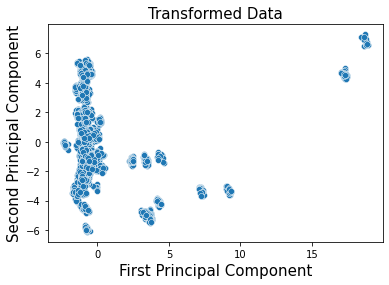

In [127]:
#plt.figure(figsize=(15,9))
sns.scatterplot(x = pca_x[:,0], y=pca_x[:,1])

plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# display the plot
plt.show()


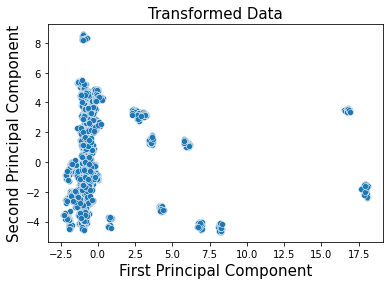

In [128]:
pca = PCA(n_components = 2, random_state = 10)  

# # fit the PCA and transform the standardized data
pca_2 = pca.fit_transform(df_sales)

# # create the dataframe using the 'DataFrame()'
# # pass the required column names to the parameter 'columns'
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

# # plot a scatterplot to visualize the dataset
# # pass the variables on x and y axes to the parameter 'x' and 'y' respectively
# # pass the dataframe to the parameter 'data'
# # pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2)

# # set the plot title and axes labels
# # set the text size using 'fontsize'
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# # display the plot
plt.show()

3. Write the intuitions about the scatter plot.

# ● PCA FOR DIMENSION REDUCTION.

1. Fit the PCA model on the data and plot a graph between n_components
and cumulative explained variance. 

In [129]:
# pca = PCA()  

# pca = pca.fit(df_sales)


In [130]:
# for i in pca.explained_variance_:
#     var = i/sum(pca.explained_variance_)*100
#     print(var)

In [131]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Explained variance')
# plt.savefig('elbow_plot.png', dpi=100)

2. In how many components we are getting approximately 90% of explained
Variance.

In [132]:
Y = data_sales
X = df_sales

# ● LDA.

1. Split the dataset into two parts (i.e. 80% train and 20% test) using
random_state=42.

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)


2. Train a Linear Discriminant Analysis(LDA) model on the train data. Do
fit_transform on the train data and only transform on the test data. Use
n_components=1.

In [134]:
lda = LDA(n_components = 1)

# fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train, y_train)

# transform the test data 
X_test_lda = lda.transform(X_test)

3. Train a RandomForest classifier model on the transformed train and test
data. Print the accuracy score.

In [135]:
model = RandomForestClassifier()


model.fit(X_train_lda, y_train)

model.score(X_test_lda,y_test)


0.9026548672566371